**README: NBA Value Analysis** 

This Exploratory Data Analysis (EDA) aims to determine the value of NBA players by analyzing their contributions and overall impact.

- **The key variables considered for player value include awards won and contributions to the team. Additionally, this analysis examines which position contributes the most to team success.**

**By analyzing historical NBA data, this project seeks to answer the following questions:**

- **What is the most valuable position in basketball?**
- **Which attributes make a position valuable?**
- **Are Point Guards, Centers, or another position the most valuable?**

In [809]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [810]:
#open players stats merged data
df = pd.read_csv("/Users/sa21/Desktop/nba-stats-api/data/player_stats/merge2000-2024.csv")
df["Year"] = df["Year"].str.split('-').str[0].astype(int) #changing year format 
# Sort the DataFrame by year
df = df.sort_values(by="Year")#order the years 

In [811]:
df.head()

,Year,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
5532,2000,Tyrone Corbin,38.0,TOR,SF,15.0,1.0,117.0,9.0,38.0,...,13.0,4.0,2.0,0.0,3.0,18.0,20.0,0.0,NaN,corbity01
5164,2000,George McCloud,33.0,DEN,SF,76.0,8.0,2007.0,250.0,655.0,...,224.0,279.0,53.0,27.0,117.0,165.0,729.0,0.0,NaN,mccloge01
5165,2000,Tyrone Hill,32.0,PHI,PF,76.0,75.0,2363.0,278.0,587.0,...,687.0,48.0,37.0,27.0,127.0,242.0,728.0,0.0,NaN,hillty01
5166,2000,Christian Laettner,31.0,2TM,C,78.0,48.0,1663.0,277.0,551.0,...,365.0,124.0,71.0,46.0,137.0,242.0,728.0,0.0,NaN,laettch01
5167,2000,Christian Laettner,31.0,DAL,C,53.0,35.0,930.0,165.0,323.0,...,212.0,67.0,40.0,27.0,70.0,159.0,398.0,0.0,NaN,laettch01


In [812]:
# relevant columns kept 
df = df[["Year", "Player", "Age", "Team", "Pos", "G", "GS", "MP", "FG","3P", "2P", "FT", "TRB", "AST", "STL", "BLK",
         "TOV", "PF", "PTS", "Trp-Dbl", "Awards"]]

# Rename columns to full name 
df = df.rename(columns={
    "Pos": "Position","G": "Games_Played",
    "GS": "Games_Started","MP": "Minutes_Played","FG": "Field_Goals_Made",
    "3P": "Three_Pointers_Made","2P": "Two_Pointers_Made",
    "FT": "Free_Throws_Made","TRB": "Total_Rebounds","AST": "Assists",
    "STL": "Steals","BLK": "Blocks","TOV": "Turnovers","PF": "Personal_Fouls","PTS": "Points","Trp-Dbl": "Triple_Doubles"})



In [813]:
df.head()

,Year,Player,Age,Team,Position,Games_Played,Games_Started,Minutes_Played,Field_Goals_Made,Three_Pointers_Made,...,Free_Throws_Made,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Points,Triple_Doubles,Awards
5532,2000,Tyrone Corbin,38.0,TOR,SF,15.0,1.0,117.0,9.0,0.0,...,2.0,13.0,4.0,2.0,0.0,3.0,18.0,20.0,0.0,NaN
5164,2000,George McCloud,33.0,DEN,SF,76.0,8.0,2007.0,250.0,77.0,...,152.0,224.0,279.0,53.0,27.0,117.0,165.0,729.0,0.0,NaN
5165,2000,Tyrone Hill,32.0,PHI,PF,76.0,75.0,2363.0,278.0,0.0,...,172.0,687.0,48.0,37.0,27.0,127.0,242.0,728.0,0.0,NaN
5166,2000,Christian Laettner,31.0,2TM,C,78.0,48.0,1663.0,277.0,4.0,...,170.0,365.0,124.0,71.0,46.0,137.0,242.0,728.0,0.0,NaN
5167,2000,Christian Laettner,31.0,DAL,C,53.0,35.0,930.0,165.0,1.0,...,67.0,212.0,67.0,40.0,27.0,70.0,159.0,398.0,0.0,NaN


In [814]:
#summing up players with two or more rows of data per year into one row
df= df.groupby(["Year", "Player"], as_index=False).agg({
    "Team": "last", #keep last team player played for that year 
    "Position":"last",  # Keeps the first recorded position 
    "Points": "sum","Assists": "sum","Blocks": "sum","Games_Played": "sum",
    "Games_Started": "sum","Minutes_Played": "sum",
    "Field_Goals_Made": "sum","Three_Pointers_Made": "sum","Two_Pointers_Made": "sum",
    "Free_Throws_Made": "sum","Assists": "sum","Steals": "sum","Blocks": "sum",
    "Turnovers": "sum","Points": "sum","Triple_Doubles": "sum","Awards": "sum"})

In [815]:
df.head()

,Year,Player,Team,Position,Points,Assists,Blocks,Games_Played,Games_Started,Minutes_Played,Field_Goals_Made,Three_Pointers_Made,Two_Pointers_Made,Free_Throws_Made,Steals,Turnovers,Triple_Doubles,Awards
0,2000,A.C. Green,MIA,PF,367.0,39.0,8.0,82.0,1.0,1411.0,144.0,0.0,144.0,79.0,30.0,45.0,0.0,0
1,2000,A.J. Guyton,CHI,PG,198.0,64.0,5.0,33.0,8.0,630.0,78.0,27.0,51.0,15.0,9.0,24.0,0.0,0
2,2000,Aaron McKie,PHI,SG,878.0,377.0,8.0,76.0,33.0,2394.0,338.0,53.0,285.0,149.0,106.0,203.0,2.0,6MOY-1
3,2000,Aaron Williams,NJN,PF,838.0,88.0,113.0,82.0,25.0,2336.0,297.0,0.0,297.0,244.0,59.0,132.0,0.0,0
4,2000,Adam Keefe,GSW,PF,168.0,36.0,20.0,67.0,13.0,836.0,64.0,1.0,63.0,39.0,28.0,40.0,0.0,0


In [816]:
df.describe()

,Year,Points,Assists,Blocks,Games_Played,Games_Started,Minutes_Played,Field_Goals_Made,Three_Pointers_Made,Two_Pointers_Made,Free_Throws_Made,Steals,Turnovers,Triple_Doubles
count,11679.000000,11679.000000,11679.000000,11679.000000,11679.000000,11679.000000,11679.000000,11679.000000,11679.000000,11679.000000,11679.000000,11679.000000,11679.000000,11679.000000
mean,2012.091189,552.934327,122.429660,26.248908,56.957188,26.772926,1314.015498,205.713674,44.443189,161.270485,97.063790,41.169021,74.531467,0.144533
std,6.982325,525.906244,147.682038,35.170565,31.955032,31.468834,1022.247802,192.400381,59.081712,161.377416,112.856908,37.778138,69.640146,1.205685
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,125.500000,21.000000,4.000000,34.000000,1.000000,408.000000,48.000000,1.000000,34.000000,18.000000,10.000000,19.000000,0.000000
50%,2012.000000,418.000000,72.000000,14.000000,61.000000,11.000000,1206.000000,158.000000,17.000000,114.000000,59.000000,32.000000,57.000000,0.000000
75%,2018.000000,831.000000,165.000000,34.000000,76.000000,52.000000,2029.000000,310.000000,71.000000,237.000000,135.000000,61.000000,109.000000,0.000000
max,2023.000000,3940.000000,1612.000000,614.000000,170.000000,166.000000,6508.000000,1392.000000,524.000000,1222.000000,1034.000000,298.000000,568.000000,42.000000


The mean is higher for most the variables, meaning it's a right skewed distrution. 
This means there are few players out performing the rest of the league. I will plot some histograms to observe the distributions.

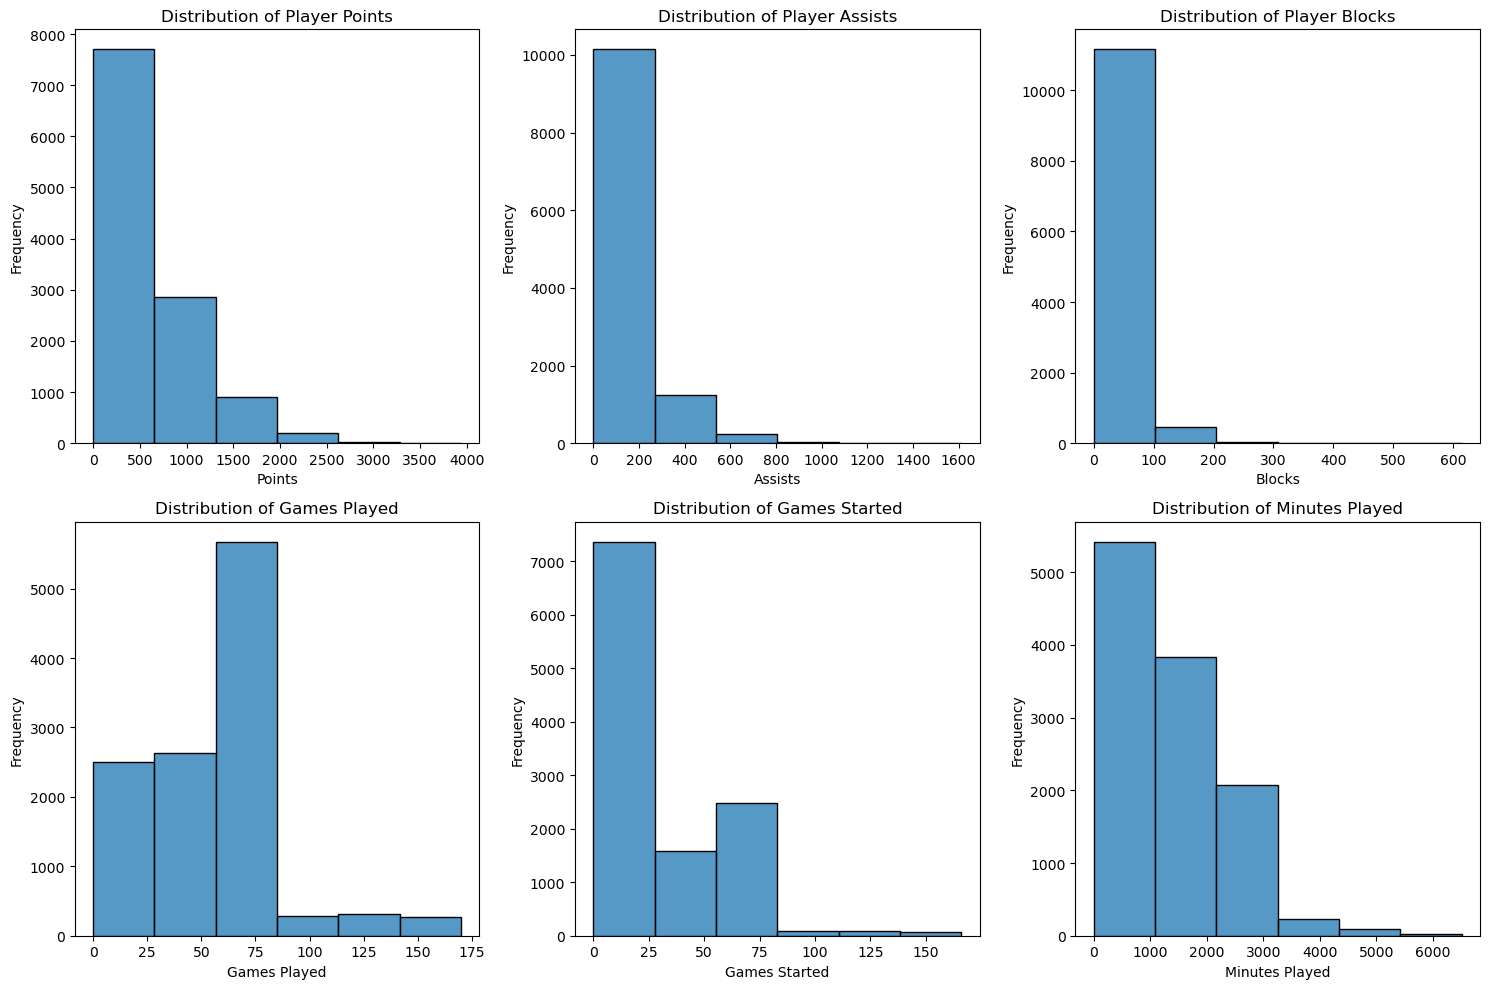

In [817]:
# figure for subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# histogram of points for all player 
sns.histplot(df["Points"], bins=6, ax=axes[0, 0], )
axes[0, 0].set_title("Distribution of Player Points")
axes[0, 0].set_xlabel("Points")
axes[0, 0].set_ylabel("Frequency")
#assists 
sns.histplot(df["Assists"], bins=6, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Player Assists")
axes[0, 1].set_xlabel("Assists")
axes[0, 1].set_ylabel("Frequency")
#blocks
sns.histplot(df["Blocks"], bins=6, ax=axes[0, 2],)
axes[0, 2].set_title("Distribution of Player Blocks")
axes[0, 2].set_xlabel("Blocks")
axes[0, 2].set_ylabel("Frequency")
#games played
sns.histplot(df["Games_Played"], bins=6, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Games Played")
axes[1, 0].set_xlabel("Games Played")
axes[1, 0].set_ylabel("Frequency")
#games started
sns.histplot(df["Games_Started"], bins=6, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Games Started")
axes[1, 1].set_xlabel("Games Started")
axes[1, 1].set_ylabel("Frequency")
#minutes playes
sns.histplot(df["Minutes_Played"], bins=6, ax=axes[1, 2])
axes[1, 2].set_title("Distribution of Minutes Played")
axes[1, 2].set_xlabel("Minutes Played")
axes[1, 2].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

Most of the graphs, if not all, are right-skewed. For example, looking at the points scored graph, we can see that there are a few players scoring over 2000 points—these are the outliers. The rest of the league frequently scores less than 500 points. MVP players are most likely found among these outliers.
Additionally, some players are playing more games, starting more games, and playing more minutes than others, these players add more value to the team.

Next I want to look at the progression of some of the stat in the NBA based on few variables. 

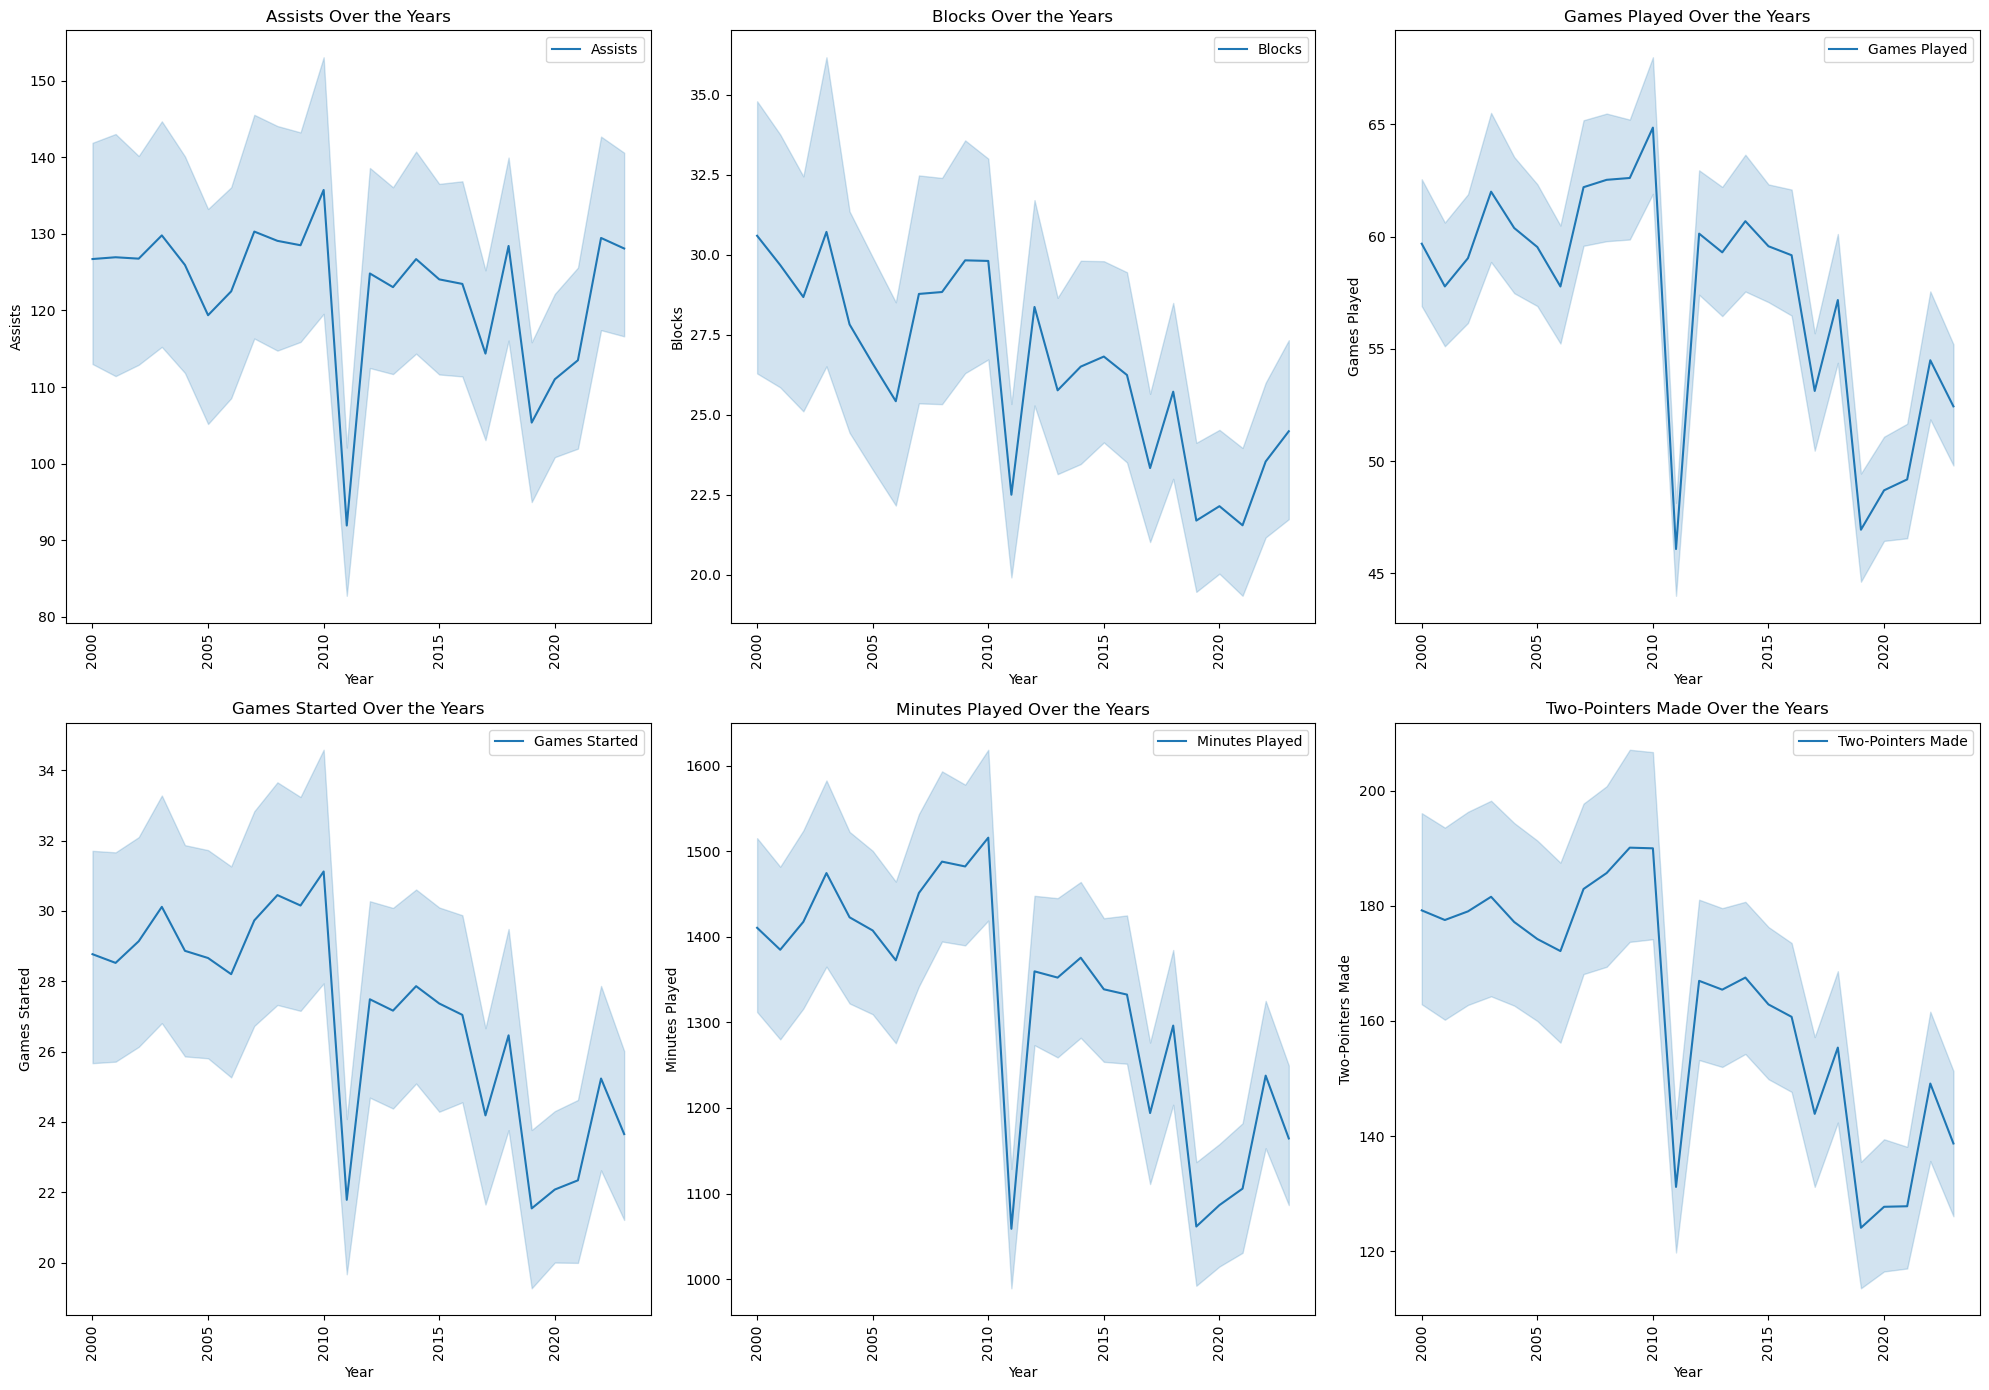

In [818]:
#ploting line plots of assists over the 24 year periode 
fig, axes = plt.subplots(2, 3, figsize=(20, 14))

# Assists
sns.lineplot(data=df, x="Year", y="Assists", ax=axes[0, 0], label="Assists")
axes[0, 0].set_title("Assists Over the Years")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Assists")
axes[0, 0].tick_params(axis='x', rotation=90)


# Blocks
sns.lineplot(data=df, x="Year", y="Blocks", ax=axes[0, 1], label="Blocks")
axes[0, 1].set_title("Blocks Over the Years")
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("Blocks")
axes[0, 1].tick_params(axis='x', rotation=90)


# Games Played
sns.lineplot(data=df, x="Year", y="Games_Played", ax=axes[0, 2], label="Games Played")
axes[0, 2].set_title("Games Played Over the Years")
axes[0, 2].set_xlabel("Year")
axes[0, 2].set_ylabel("Games Played")
axes[0, 2].tick_params(axis='x', rotation=90)


# Games Started
sns.lineplot(data=df, x="Year", y="Games_Started", ax=axes[1, 0], label="Games Started")
axes[1, 0].set_title("Games Started Over the Years")
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Games Started")
axes[1, 0].tick_params(axis='x', rotation=90)


# Minutes Played
sns.lineplot(data=df, x="Year", y="Minutes_Played", ax=axes[1, 1], label="Minutes Played")
axes[1, 1].set_title("Minutes Played Over the Years")
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Minutes Played")
axes[1, 1].tick_params(axis='x', rotation=90)

#Two-Pointers Made
sns.lineplot(data=df, x="Year", y="Two_Pointers_Made", ax=axes[1, 2], label="Two-Pointers Made")
axes[1, 2].set_title("Two-Pointers Made Over the Years")
axes[1, 2].set_xlabel("Year")
axes[1, 2].set_ylabel("Two-Pointers Made")
axes[1, 2].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()


I chose variables that are commonly used to track trends: 3-pointers made, games played, assists, and blocks. I expected to see everything increase, but only 3-pointers showed a significant rise. All the graphs indicate a drop around 2012 and 2020, which could be due to historical events such as COVID in 2020 and other NBA events in 2012.

To begin analyzing based on positions, I first want to understand how the positions are distributed across all teams.

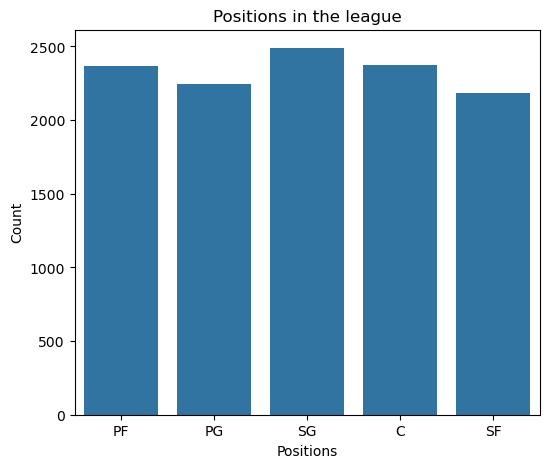

In [819]:
#bar graph shoowing all position in the league
plt.figure(figsize=(6,5))
sns.countplot(x=df['Position']) #positions in league
plt.title("Positions in the league")
plt.xlabel("Positions")
plt.ylabel("Count")
plt.show()

This graph helps me understand the count of each position in the league. The counts for all positions are fairly close, with over 2000 players for each position over the last 24 years. Small Forwards have the most players, reaching almost 2500.

I then filter out all players who were nominated for the mvp awards into on data frame 

In [820]:
#filters all players nominated or awarded MVP award over the last 24 years
mvp_awards_list = df[df["Awards"].str.contains("MVP", case=False, na=False)] 


In [821]:
#counting each position in new award list df 
df_mvp_count = mvp_awards_list["Position"].value_counts().reset_index()
df_mvp_count

,Position,count
0,PG,97
1,PF,72
2,C,58
3,SG,57
4,SF,48


When looking at the count of awarded players by position point guards are awarded or nominated the most. This does not tell us if they won the MVP award only that they are moninated or won the most. 

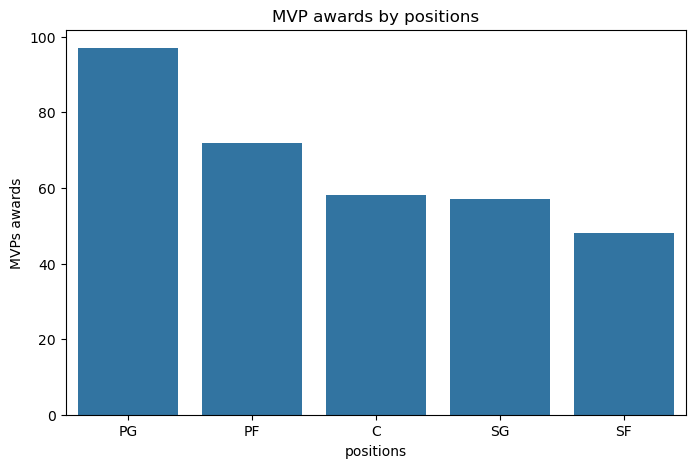

In [822]:
#filtering out mvp awards by position 
mvp_counts = mvp_awards_list["Position"].value_counts().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=mvp_counts, x= "Position", y= "count")
plt.xlabel("positions")
plt.ylabel("MVPs awards")
plt.title("MVP awards by positions")
plt.show()

Next, I compare all positions based on points scored and three-pointers made to understand which position is scoring the most among all players.

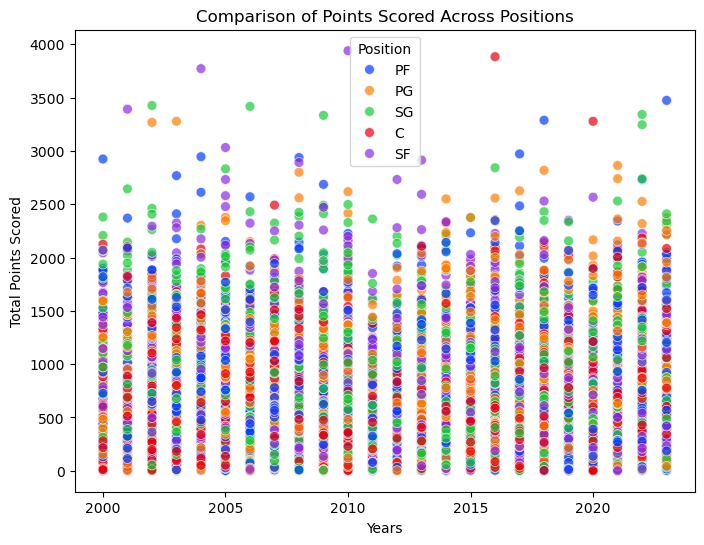

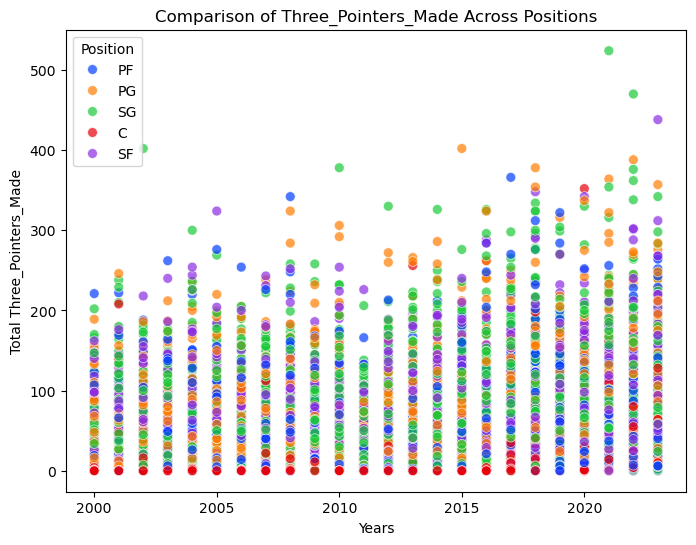

In [823]:
# Set figure size
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Year", y="Points", hue="Position", palette="bright",s=50 , alpha=0.7)
plt.xlabel("Years")
plt.ylabel("Total Points Scored")
plt.title("Comparison of Points Scored Across Positions")
plt.legend(title="Position")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Year", y="Three_Pointers_Made", hue="Position", palette="bright", s=50 , alpha=0.7)
plt.xlabel("Years")
plt.ylabel("Total Three_Pointers_Made")
plt.title("Comparison of Three_Pointers_Made Across Positions")
plt.legend(title="Position")
plt.show()



Points guards tend to be high on the lists. most y

To further analys the stats by position, I choose more defensives stats to see whether point guards are good defensive players. and comtributr to their teams that way.

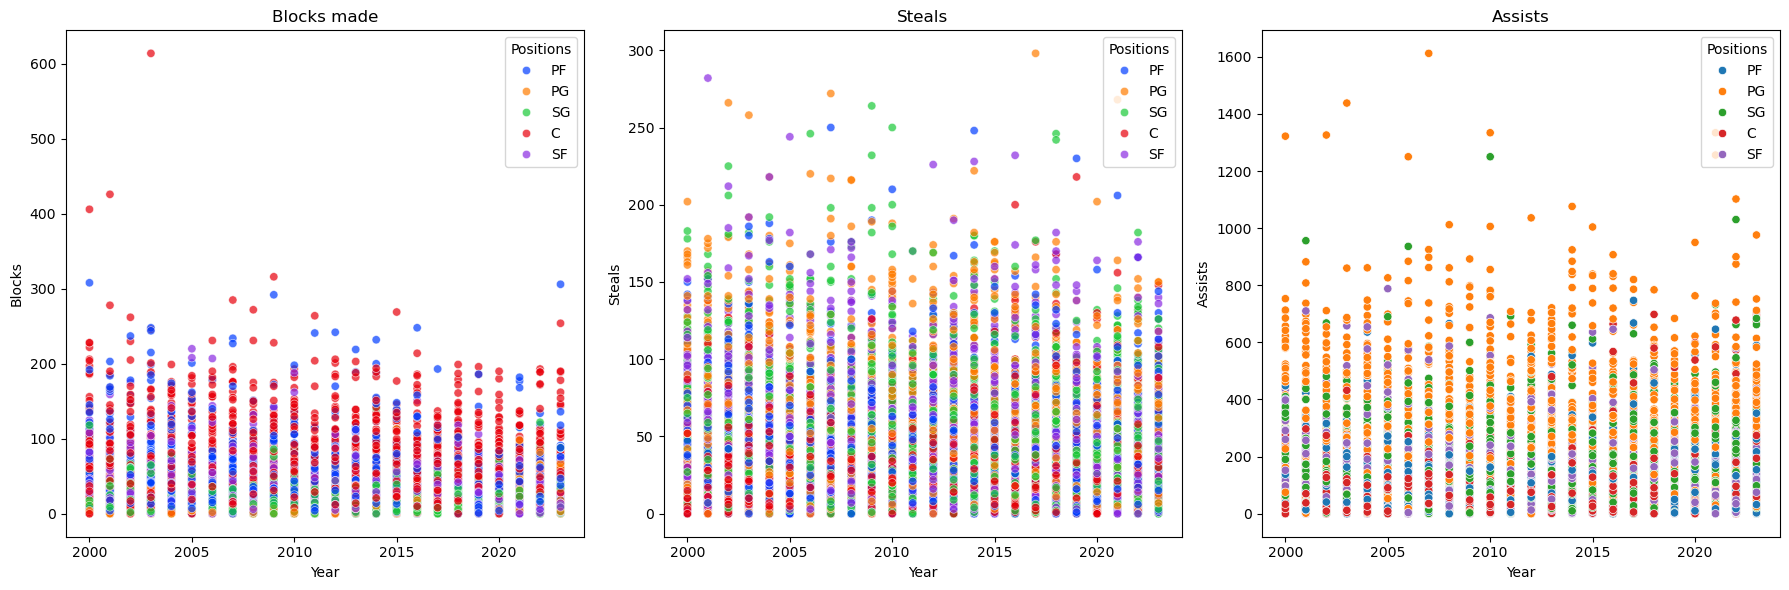

In [824]:


# Create a figure with 1 row and 3 columns for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter Plot 1: Points Scored
sns.scatterplot(data=df, x="Year", y="Blocks", hue="Position", palette="bright", alpha=0.7, ax=axes[0])
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Blocks")
axes[0].set_title("Blocks made")
axes[0].legend(title="Positions")

# Scatter Plot 2: Three-Pointers Made
sns.scatterplot(data=df, x="Year", y="Steals", hue="Position", palette="bright", alpha=0.7, ax=axes[1])
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Steals")
axes[1].set_title("Steals")
axes[1].legend(title="Positions")

# Scatter Plot 3: Two-Point Percentage
sns.scatterplot(data=df, x="Year", y="Assists", hue="Position", ax=axes[2])
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Assists")
axes[2].set_title("Assists")
axes[2].legend(title="Positions")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show all plots in a single figure
plt.show()


Looking at the more defensive stats and assists, I can see that Point Guards don’t contribute much blocks. However, they overwhelmingly contribute more assists than any other position.

In [825]:
df_MVP = pd.read_csv("/Users/sa21/Desktop/nba-stats-api/data/MVPs.csv")


This dataset contains MVP winners for all years between 2001 and 2024. I would like to further analyze this data by position to see the differences and contributions of MVP winners by position.